# Operating with vectors

### 1. Addition

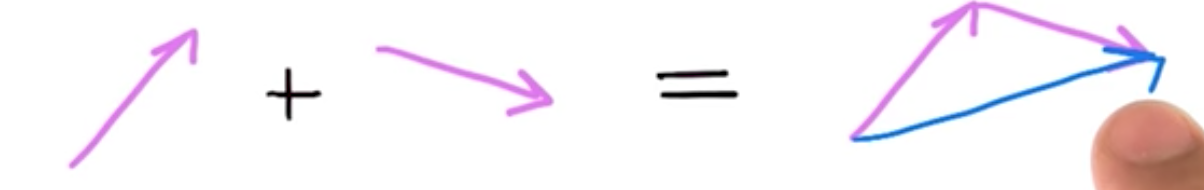

\begin{equation*}
\begin{vmatrix}
\mathbf{a} \\
2 \\
4
\end{vmatrix} + 
\begin{vmatrix}
\mathbf{b} \\
5 \\
1
\end{vmatrix}
=
\begin{vmatrix}
\mathbf{c} \\
7 \\
5
\end{vmatrix}
\end{equation*}

In [1]:
add :: [Float] -> [Float] -> [Float]
add a b = zipWith (+) a b

add [3, 2] [2, 3]

[5.0,5.0]

### 2. Substraction

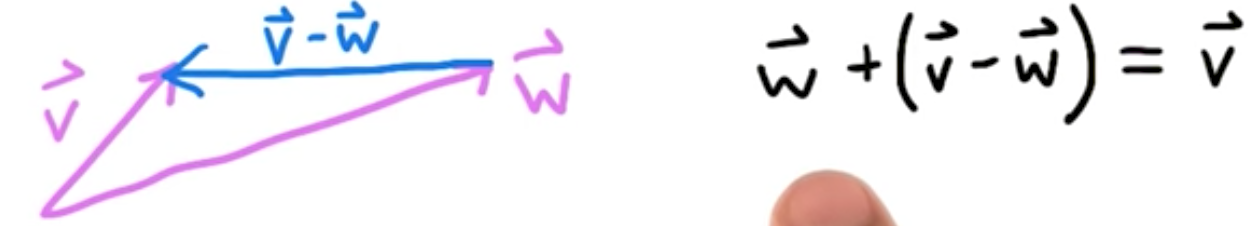

\begin{equation*}
\begin{vmatrix}
\mathbf{a} \\
2 \\
4
\end{vmatrix} 
- 
\begin{vmatrix}
\mathbf{b} \\
5 \\
1
\end{vmatrix}
=
\begin{vmatrix}
\mathbf{c} \\
-3 \\
3
\end{vmatrix}
\end{equation*}



In [2]:
sub :: [Float] -> [Float] -> [Float]
sub a b = zipWith (-) a b

sub [3, 2] [2, 3]

[1.0,-1.0]

### 2. Scalar Multiplication

The vector is multiplied by a number called scalar.

With this operation we can switch the direction and lenght of the vector.

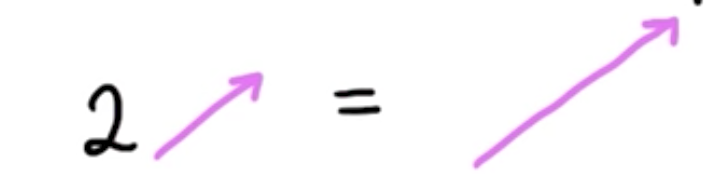

\begin{equation*}
3
* 
\begin{vmatrix}
\mathbf{b} \\
5 \\
1
\end{vmatrix}
=
\begin{vmatrix}
\mathbf{c} \\
15 \\
3
\end{vmatrix}
\end{equation*}


In [3]:
scale :: Float -> [Float] -> [Float]
scale s a = map ( s * ) a

scale 3 [5, 1]

[15.0,3.0]

## Quiz

### Plus, Minus, Scalar Multiply

In [4]:
add [8.218, -9.341] [-1.129, 2.111]
sub [7.119, 8.215] [-8.223, 0.878]
scale 7.41 [1.671, -1.012, -0.318]

[7.0890007,-7.2299995]

[15.341999,7.337]

[12.38211,-7.4989195,-2.35638]

## Magnitude and Direction

* **Magnitude**: refers to how much movement it quantifies.
* **Direction**: where this movement is pointed.


#### Magnitude

Defining the vector as an arrow from one point to another, the **magnitude** of the vector is the lenght of that arrow or the distance of between the two points. To calculate that distance we can use the [pythagoream theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem).

Pythagorean Formulae:

\begin{equation*}
\mathbf{C}^2 + \mathbf{c}^2 = \mathbf{h}^2
\end{equation*}

Applied to vectors:

\begin{equation*}
||\vec{V}|| = \sqrt{
    \mathbf{v}_a^2 +
        \mathbf{v}_b^2 +
        \cdots +
        \mathbf{v}_z^2
    }
\end{equation*}

In [5]:
sq :: [Float] -> [Float]
sq = map (^2)

sumvec :: [Float] -> Float
sumvec = foldr (+) 0

vecmod :: [Float] -> Float
vecmod = sqrt . sumvec . sq

vecmod [3, 2]

3.6055512

#### Direction

**Unit vector**, is a vector with a magnitude of 1, a vector direction can be represented by an unit vector.

**Vector normalization**, we can normalize a vector for getting an unit vector with the direction of the denormalized vector.

\begin{equation*}
\frac{1}{||\vec{v}||} * \vec{v} = \vec{u}
\end{equation*}

In [6]:
unit :: [Float] -> [Float]
unit v = map ((1 / vecmod v) *) v
unit [-1, 1, 1]

[-0.57735026,0.57735026,0.57735026]

### Quiz

Magnitud and direction

In [7]:
vecmod [-0.221, 7.437]
vecmod [8.813, -1.331, -6.247]

unit [5.581, -2.136]
unit [1.996, 3.108, -4.554]

7.440283

10.884187

[0.9339352,-0.35744232]

[0.34040132,0.5300437,-0.77664703]

### Inner Products (dot products)

The inner products let us find the angle between two differents vectors.

$\vec{v} \cdot \vec{W}$

Is equal to the product of their modules and $\cos \theta$, so:

\begin{equation*}
\vec{V} \cdot \vec{W}
=
||\vec{V}|| * ||\vec{W}|| * \cos \theta
\end{equation*}

To find $\theta$ we have to use the inverse of $\cos$, $\arccos$ resulting:

\begin{equation*}
\arccos\Bigl(\frac{\vec{V} \cdot \vec{W}}{||\vec{V}|| * ||\vec{W}||}\Bigr)
=
\theta
\end{equation*}

We can look at that formula and see it in other way, like the arccos of the products of their normalizations:

\begin{equation*}
\arccos\Bigl(\frac{1}{||\vec{V}||}\vec{V}\cdot\frac{1}{||\vec{W}||}\vec{W}\Bigr)
=
\theta
\end{equation*}

In [8]:
dot :: [Float] -> [Float] -> Float
dot v w = foldr (+) 0 (zipWith (*) v w)

theta :: [Float] -> [Float] -> Float
theta v w = acos (dot (unit v) (unit w))

### Quiz

Dot product and angle

In [9]:
dot [7.887, 4.138] [-8.802, 6.776]
dot [-5.955, -4.904, -1.874] [-4.496, -8.755, 7.103]

theta [3.183, -7.627] [-2.668, 5.319]
theta [7.35, 0.221, 5.188] [2.751, 8.259, 3.985]

-41.382286

56.39718

3.0720265

1.0520114

## Parallelism and Orthogonality

**Parallelism**: A vector is parallel to another when their modules are equivalents.

**Orthogonality**: Two vectors are orthogonals to each other when their dot product is 0, the Zero vector is orthogonal to any vector included himself.

In [10]:
allTheSame :: [Float] -> Bool
allTheSame xs = and $ map (== head xs) (tail xs)

parallel :: [Float] -> [Float] -> Bool
parallel a b = allTheSame $ zipWith (/) a b

orthogonal :: [Float] -> [Float] -> Bool
orthogonal a b = dot a b == 0

### Quiz

Parallelism and Orthogonality

In [11]:
parallel [-7.579, -7.88][22.737, 23.64]
orthogonal [-7.579, -7.88][22.737, 23.64]

parallel [-2.029, 9.97, 4.172][-9.231, -6.639, -7245]
orthogonal [-2.029, 9.97, 4.172][-9.231, -6.639, -7245]

parallel [-2.328, -7.284, -1.214][-1.821, 1.072, -2.94]
orthogonal [-2.328, -7.284, -1.214][-1.821, 1.072, -2.94]

parallel [2.118, 4.827][0, 0]
orthogonal [2.118, 4.827][0, 0]

True

False

False

False

False

False

True

True

## Projecting Vectors

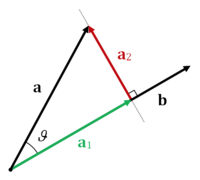

The projection ($\vec{a}_1$) of a vector **$\vec{a}$** on other vector **$\vec{b}$** is the orthogonal projection of **$\vec{a}$** onto a straight line parallel to **$\vec{b}$**.

Based on this we have the next formulas:

\begin{equation*}
a_1
=
|\vec{a}|\cos\theta
=
\vec{a}\cdot\vec{b}_u
=
\vec{a}\cdot\frac{\vec{b}}{|\vec{b}|}
\end{equation*}

**Orthogonality:** tool for decomposing objects into combinations of simpler objects in a structured way.


In [41]:
projection :: [Float] -> [Float] -> [Float]
projection a b =
    let bunit = unit b
        a' = dot a bunit
    in scale a' bunit

rejection :: [Float] -> [Float] -> [Float]
rejection a b = sub a $ projection a b

### Quiz

Projection, Orthogonality

In [42]:
projection [3.039, 1.879][0.825, 2.036]
rejection [-9.88, -3.264, -8.159][-2.155, -9.353, -9.473]

a1 = projection [3.009, -6.172, 3.692, -2.51][6.404, -9.144, 2.759, 8.718]
a2 = rejection [3.009, -6.172, 3.692, -2.51][6.404, -9.144, 2.759, 8.718]
add a1 a2

[1.082607,2.6717432]

[-8.350081,3.3760614,-1.4337463]

[3.009,-6.172,3.692,-2.51]

## Cross Product

* Another form of vector multiplication
* Only exists in three dimensions

A cross product is a product between two vectors that produces a third vector that is orthogonal to both of them.

The resultant vector is a vector with the magnitude of $||\vec{v}||\cdot||\vec{w}||\cdot\sin\theta$

The cross product formula is:

\begin{equation*}
    \vec{V}\times\vec{W}
    =
    \begin{vmatrix}
        \mathbf{x}_V \\
        \mathbf{y}_V \\
        \mathbf{z}_V
    \end{vmatrix}
    \times
    \begin{vmatrix}
        \mathbf{x}_W \\
        \mathbf{y}_W \\
        \mathbf{z}_W
    \end{vmatrix}
    =
    \begin{vmatrix}
        \mathbf{y}_v\mathbf{z}_w - \mathbf{y}_w\mathbf{z}_v \\
        -(\mathbf{x}_v\mathbf{z}_w - \mathbf{x}_w\mathbf{z}_v) \\
        \mathbf{x}_v\mathbf{y}_w - \mathbf{x}_w\mathbf{y}_v \\
    \end{vmatrix}
\end{equation*}

With the cross product we also can have a parallelogram area, extracting the length of the cross product vector; also we can know the triangle area dividing the parallelogram area by 2.

In [70]:
import Data.Vector

cross :: [Float] -> [Float] -> [Float]

cross a b =
    let a' = fromList a
        b' = fromList b
    in [(a'!1*b'!2) - b'!1*a'!2, -( a'!0 * b'!2 - b'!0 * a'!2), a'!0 *b'!1 - b'!0 *a'!1]

parallelogramArea :: [Float] -> [Float] -> Float
parallelogramArea a b = vecmod $ cross a b 

triangleArea :: [Float] -> [Float] -> Float
triangleArea a b = (/ 2) $ parallelogramArea a b

### Quiz

Cross product, parallelogram area and triangle area

In [73]:
cross [8.462, 7.893, -8.187][6.984, -5.975, 4.778]
parallelogramArea [-8.987, -9.838, 5.031][-4.268, -1.861, -8.866]
triangleArea [1.5, 9.547, 3.691][-6.007, 0.124, 5.772]

[-11.204571,-97.60945,-105.685165]

142.12224

42.564938